# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [27]:
# Import packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 
Download the data from [here](https://drive.google.com/file/d/1o-vZHHSywBksnPuGRunvpdYN7grYbe8h/view?usp=sharing) and place it in the data folder

In [28]:
# Your code here

boston = pd.read_csv('../data/boston_data.csv')

In [29]:
boston.dtypes

# all data types are numerical

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [30]:
boston.isnull().sum()

# no missing values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [31]:
#plt.figure(figsize=(16,10))

#sns.boxplot(x="variable", y="value", data=pd.melt(boston))

In [32]:
# Remove outliers
# Normally I wouldn't just remove all outliers like this without inspection and good reason
# but because this is just practise and I don't know what the variables mean I'm removing all rows with at least one outlier
#Paolo:ok. You could try if without removing outliers the model improves

boston2 = boston[(np.abs(stats.zscore(boston)) < 3).all(axis=1)]

In [33]:
print(boston.shape)
print(boston2.shape)

# 83 rows were removed because they contained at least one outlier

(404, 14)
(321, 14)


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [34]:
# Your plots here

boston2.corr()

# from this table it appears that two variables are most correlated with house price (medv): 'rm' (r = 0.71) and 'lstat' (r = -0.75)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.245049,0.523523,NaN,0.562803,-0.199660,0.436390,-0.485358,0.811224,0.749920,0.344787,-0.327797,0.563541,-0.504009
zn,-0.245049,1.000000,-0.467428,NaN,-0.444377,0.295135,-0.453536,0.559321,-0.245867,-0.265426,-0.350184,0.148885,-0.365562,0.342641
indus,0.523523,-0.467428,1.000000,NaN,0.721443,-0.362448,0.562405,-0.659449,0.569357,0.705728,0.327299,-0.324725,0.613879,-0.565210
chas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nox,0.562803,-0.444377,0.721443,NaN,1.000000,-0.274451,0.705628,-0.762902,0.581103,0.642956,0.119749,-0.349625,0.589708,-0.467456
rm,-0.199660,0.295135,-0.362448,NaN,-0.274451,1.000000,-0.194372,0.190069,-0.111475,-0.206632,-0.232715,0.107586,-0.613583,0.712762
age,0.436390,-0.453536,0.562405,NaN,0.705628,-0.194372,1.000000,-0.695878,0.402581,0.466754,0.195327,-0.234018,0.605873,-0.454210
dis,-0.485358,0.559321,-0.659449,NaN,-0.762902,0.190069,-0.695878,1.000000,-0.454150,-0.518759,-0.182534,0.265998,-0.495526,0.314168
rad,0.811224,-0.245867,0.569357,NaN,0.581103,-0.111475,0.402581,-0.454150,1.000000,0.902493,0.424147,-0.321713,0.456052,-0.425741
tax,0.749920,-0.265426,0.705728,NaN,0.642956,-0.206632,0.466754,-0.518759,0.902493,1.000000,0.422950,-0.340601,0.529352,-0.535400


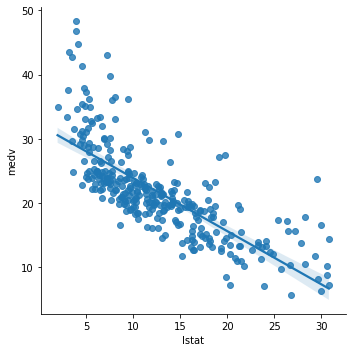

In [35]:
# I'll plot those two variables against medv

sns.lmplot(x ='lstat', y ='medv', data = boston2) 

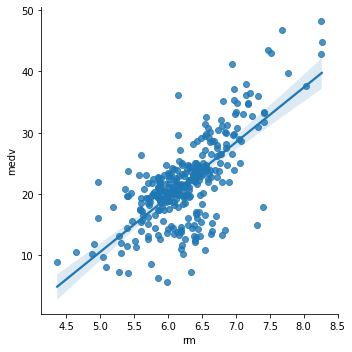

In [36]:
sns.lmplot(x ='rm', y ='medv', data = boston2) 

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [37]:
# Your response here

# lstat seems to be negatively correlated with house price
# rm seems to be posititively correlated with house price
# I don't know what lstat or rm means so I can't say what expected to see

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

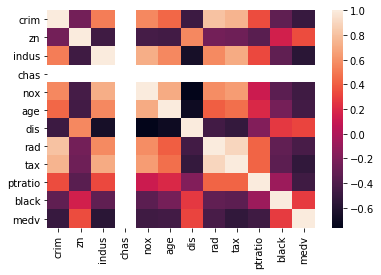

In [38]:
# Your response here
corr = boston2.drop(columns = ['lstat', 'rm'], axis = 1).corr()
sns.heatmap(corr)

# there are no other high correlations
# I do see that something strange is going on with variable 'chas'

In [39]:
boston2['chas'].value_counts()

# boston2 has value 0.0 for all instances so that column should be removed for the rest of the analysis

0.0    321
Name: chas, dtype: int64

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [40]:
# Your code here

boston['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [41]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [42]:
# Your code here

y = boston2['medv']
X = boston2.drop('medv', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# according to the documentation train_test_split shuffles the data by default 
#Paolo:yes

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [122]:
# Five separate RFR here with the given max depths

RFR2 = RandomForestRegressor(max_depth=2)
RFR4 = RandomForestRegressor(max_depth=4)
RFR6 = RandomForestRegressor(max_depth=6)
RFR8 = RandomForestRegressor(max_depth=8)
RFR10 = RandomForestRegressor(max_depth=10)


Now, plot the score for each tree on the training set and on the testing set.

In [123]:
# Produce a plot with the score for the testing and training for the different max depths

models = [RFR2, RFR4, RFR6, RFR8, RFR10]
r2score_train = []
r2score_test = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    r2score_train.append(r2_score(y_train, y_pred))
    y_test_pred = model.predict(X_test)
    r2score_test.append(r2_score(y_test, y_test_pred))

In [124]:
df_r2 = pd.DataFrame(list(zip(r2score_train, r2score_test)), index = ['RFR2', 'RFR4', 'RFR6', 'RFR8', 'RFR10'], columns =['r2_train', 'r2_test'])


In [125]:
df_r2

,r2_train,r2_test
RFR2,0.795643,0.671221
RFR4,0.912834,0.749417
RFR6,0.957890,0.738936
RFR8,0.970284,0.746269
RFR10,0.974874,0.752651


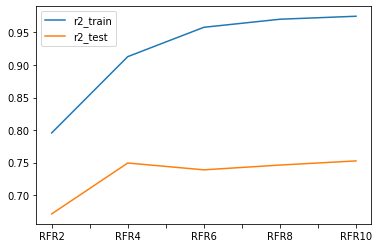

In [128]:
#Paolo: alternative plot
df_r2.plot()

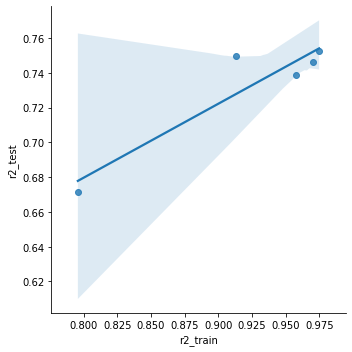

In [129]:
sns.lmplot('r2_train', 'r2_test', data = df_r2)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [92]:
# Your response here

# Looking at the figure and the r2 scores in the table df_r2, the higher the max depth, the better the model performs
# The model with max depth = 10 has the highest r2 score for the train and the test set
# but the r2 scores for the models with max depths of 6,8 and 10 are very similar 

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [24]:
# Your response here

# When the model is trained with a maximum depth of 1 there is a high bias, 
# when the depth increases the bias becomes lower but the variance higher
# so max depth 10 has low bias but high variance
#Paolo:yes

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [25]:
# Your response here

# I think max depth of 6 has a higher max depth doesn't improve the model score much

#Paolo: I think for the highest depths you maybe approaching overfit. 
# You could try to plot more depths and see how train and test perform.

#Paolo:If you look at the plots, you could see that the r2_train  keeps increasing till plateau, the  r2_test 
# also but then starts going down. I would choose the parameters
# that corresponds to the minimum of the r_2_test. After that there is a high chance that
# you have overfit. Have a look here 
# (train and test error in his explanation correspond to r_2_train ant r_2_test but 
# the plots are inverted, if the error goes down r_2 increases)
# https://www.youtube.com/watch?v=fDQkUN9yw44&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=61

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [26]:
# Your response here

# I guess the data isn't very relevant today anymore as the housing situation has changed a lot since 1978
# I don't know what the columns/ features mean (did I miss something?)
# The model does seem to score quite well (or am I wrong?)
# the data collected in Boston would probably not be representative for a rural city
#Paolo: yes, I agree